# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd

#Load the data
data = pd.read_csv('math_datasets.csv')

In [2]:
#Lấy mẫu dữ liệu 100% dữ liệu gốc
df_sample = data.sample(frac=1, random_state=42)

#Tiền xử lý dữ liệu đơn giản
import re
def clean_text(text):
    # Loại bỏ các ký tự đặc biệt và chuyển văn bản thành chữ thường
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    return text

#Áp dụng làm sạch dữ liệu
df_sample['Input Text'] = df_sample['Input Text'].apply(clean_text)
df_sample.head()

,Input Text,Math_Type,Math_Formula
17,determine the limit of 1x as x approaches infi...,Limits,lim (x -> ∞) (1/x)
13,find the derivative of this function fx 7x2 ...,Differentiation,f(x) = 7x^2 - 2x + 3
4,determine the limit of sinxx as x approaches to 0,Limits,lim (x -> 0) (sin(x)/x)
29,find the eigenvalues of the matrix h 2 3 3 4,Eigenvalue Calculation,"H = [[2, 3], [3, 4]]"
35,find the inverse of the matrix i 2 3 1 4,Matrix Algebra,"Inverse(I) = [[2, 3], [1, 4]]^(-1)"


In [3]:
#đánh nhãn dữ liệu bằng BERT
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the input text
label_map = {label: idx for idx, label in enumerate(df_sample['Math_Type'].unique())}
df_sample['Label'] = df_sample['Math_Type'].map(label_map)
df_sample.head()

,Input Text,Math_Type,Math_Formula,Label
17,determine the limit of 1x as x approaches infi...,Limits,lim (x -> ∞) (1/x),0
13,find the derivative of this function fx 7x2 ...,Differentiation,f(x) = 7x^2 - 2x + 3,1
4,determine the limit of sinxx as x approaches to 0,Limits,lim (x -> 0) (sin(x)/x),0
29,find the eigenvalues of the matrix h 2 3 3 4,Eigenvalue Calculation,"H = [[2, 3], [3, 4]]",2
35,find the inverse of the matrix i 2 3 1 4,Matrix Algebra,"Inverse(I) = [[2, 3], [1, 4]]^(-1)",3


1.3. Sử dụng TF-IDF để chuyển đổi văn bản thành Vector số

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000) # Giới hạn số lượng đặc trưng để giảm tài nguyên
X = vectorizer.fit_transform(df_sample['Input Text'])
y = df_sample['Label']

In [5]:
#Chia dữ liệu thành tập huấn luyện và kiểm tra
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Huấn luyện mô hình
from sklearn.linear_model import LogisticRegression
#Khai báo thư viện Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf.fit(X_train, y_train)

model_lr = LogisticRegression(max_iter=100)
model_lr.fit(X_train, y_train)

LogisticRegression()

In [6]:
#Đánh giá mô hình Random Forest
from sklearn.metrics import accuracy_score
y_pred_rf = model_rf.predict(X_test)
print(f'Độ chính xác của Random Forest: {accuracy_score(y_test, y_pred_rf)}')

Độ chính xác của Random Forest: 1.0


In [7]:
#Danh gia mo hinh Logistic Regression
y_pred_lr = model_lr.predict(X_test)
print(f'Độ chính xác của Logistic Regression: {accuracy_score(y_test, y_pred_lr)}')

Độ chính xác của Logistic Regression: 0.375


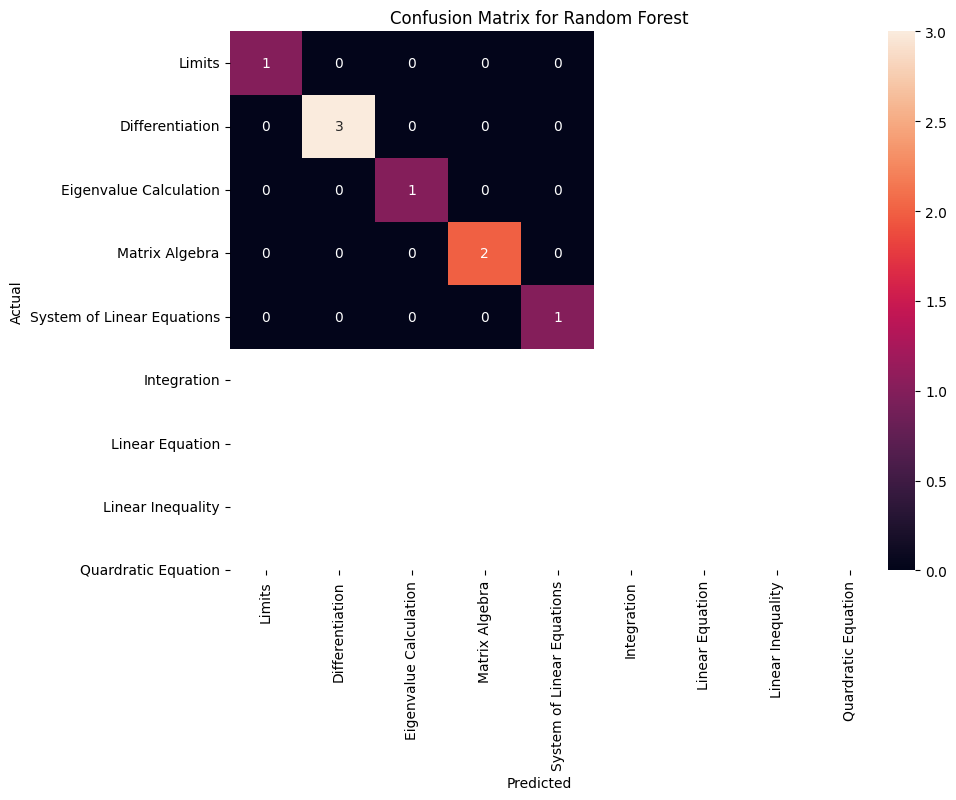

In [8]:
#So sánh hiệu suất của 2 mô hình
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Tạo ma trận nhầm lẫn cho Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

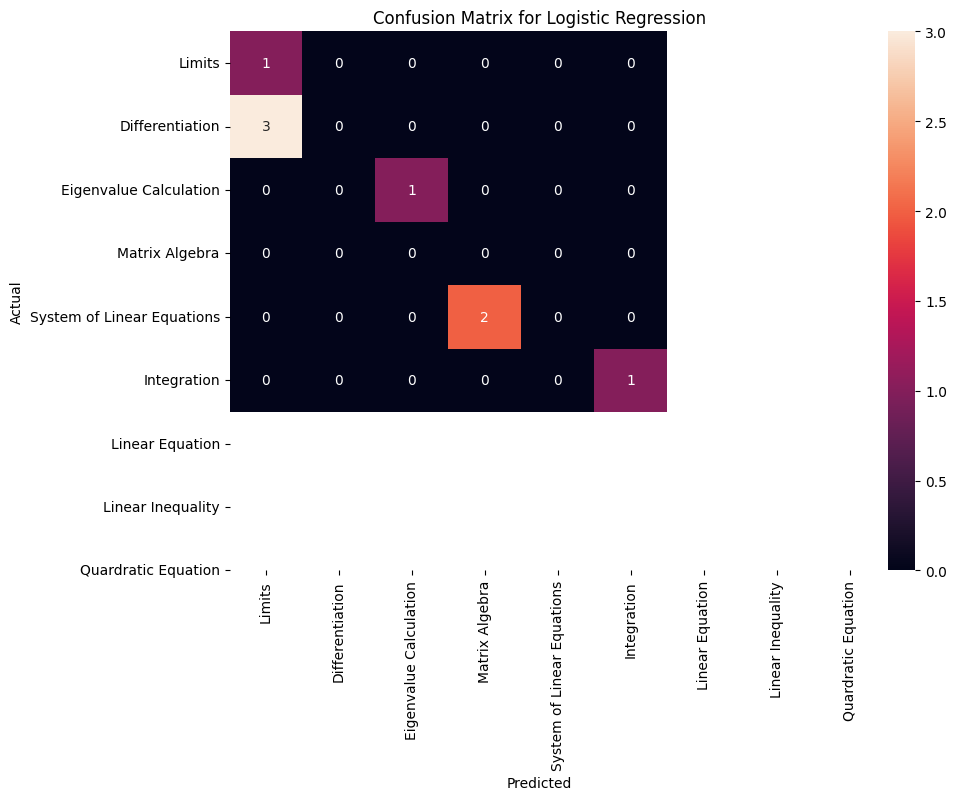

In [9]:
#Tạo ma trận nhầm lẫn cho Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [10]:
#đánh giá hiệu suất của model
from sklearn.metrics import classification_report

print('Random Forest:')
print(classification_report(y_test, y_pred_rf))

print('Logistic Regression:')
print(classification_report(y_test, y_pred_lr))

Random Forest:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Logistic Regression:
              precision    recall  f1-score   support

           2       0.25      1.00      0.40         1
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00         1

    accuracy                           0.38         8
   macro avg       0.38      0.50      0.

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

In [11]:
#Test model
def predict_math_type(input_text):
    # Clean the input text
    clean_input = clean_text(input_text)
    
    # Vectorize the input text
    input_vector = vectorizer.transform([clean_input])
    
    # Predict the math type
    pred = model_rf.predict(input_vector)
    
    # Map the prediction back to the original label
    inv_label_map = {v: k for k, v in label_map.items()}
    return inv_label_map[pred[0]]

#Test model
input_text = "Find the determinant of the matrix A = [[1, 2], [3, 4]]."
print(f'Input Text: {input_text}')
print(f'Predicted Math Type: {predict_math_type(input_text)}')

Input Text: Find the determinant of the matrix A = [[1, 2], [3, 4]].
Predicted Math Type: Matrix Algebra


Sau khi đã phân loại được dạng toán xong, thì bước tiếp theo là tiến hành xây dựng trình tự giải toán với SymPy

In [12]:
#Sau khi nhận dạng được dạng toán rồi, bước tiếp theo là dùng SymPy để giải toán
!pip install sympy


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [13]:
from gtts import gTTS

def text_to_speech(text, output_file, lang='en'):
    if not isinstance(text, str):
        text = str(text)  # Chuyển đổi thành chuỗi nếu không phải chuỗi
    tts = gTTS(text, lang=lang)
    tts.save(output_file)
    return output_file

## Giải phương trình bậc nhất

In [14]:
import re
import sympy as sp

# Hàm giải phương trình bậc 1 với các bước chi tiết
def solve_linear_equation_step_by_step(input_text):
    # Tách và làm sạch phương trình từ văn bản đầu vào
    equation_match = re.search(r'equation\s+(.*)', input_text)
    if not equation_match:
        return "Can't find the equation in the input text."
    
    equation = equation_match.group(1).strip()
    print(f'The function input: {equation}')
    
    # Xử lý các trường hợp thiếu dấu nhân giữa số và biến (2x -> 2*x)
    equation = re.sub(r'(\d)([a-zA-Z])', r'\1*\2', equation)
    
    # Tách phương trình thành hai phần (trái và phải dấu "=")
    lhs, rhs = equation.split('=')
    
    # Tạo biểu thức phương trình bằng SymPy
    expr = sp.Eq(sp.sympify(lhs), sp.sympify(rhs))
    
    # Giải phương trình
    x = sp.symbols('x')
    solution = sp.solve(expr, x)
    
    # Khởi tạo danh sách lưu các bước giải
    steps = []
    
    # Bước 1: Chuyển vế phải của phương trình sang trái (chuyển tất cả về một vế)
    steps.append(f"Step 1: {lhs} - ({rhs}) = 0")
    
    # Tạo một biểu thức tạm thời
    temp_expr = sp.sympify(lhs) - sp.sympify(rhs)
    
    # Bước 2: Đơn giản hóa phương trình
    simplified_expr = sp.simplify(temp_expr)
    steps.append(f"Step 2: {simplified_expr} = 0")
    
    # Bước 3: Giải phương trình để tìm x
    if len(solution) == 1:
        steps.append(f"Step 3: x = {solution[0]}")
    else:
        steps.append(f"Bước 3: {simplified_expr} = 0 -> No solution or multiple solutions")
    
    steps_text = "\n".join(steps)

    result_text = f"The solutions of this equation is: x = {solution[0]}\n\n" \
                  f"Step-by-step to solve the function:\n{steps_text}"

    # In ra kết quả cuối cùng
    print(f"The solutions of this equation is: x = {solution[0]}")
    print("Step-by-step to solve the function:")
    for step in steps:
        print(step)
    
    audio_file = text_to_speech(result_text, 'math_solution.mp3',lang='en')
    return audio_file

## Giải phương trình bậc hai

In [15]:
import re
import sympy as sp

def solve_quadratic_equation_step_by_step(input_text):
    # Tách và làm sạch phương trình từ văn bản đầu vào
    equation_match = re.search(r'equation\s+(.*)', input_text)
    if not equation_match:
        return "Can't find the equation in the input text."
    
    equation = equation_match.group(1).strip()
    print(f'The function input: {equation}')
    
    # Xử lý các trường hợp thiếu dấu nhân giữa số và biến (2x -> 2*x)
    equation = re.sub(r'(\d)([a-zA-Z])', r'\1*\2', equation)
    
    # Tách phương trình thành hai phần (trái và phải dấu "=")
    lhs, rhs = equation.split('=')
    
    # Tạo biểu thức phương trình bằng SymPy
    x = sp.symbols('x')
    expr = sp.Eq(sp.sympify(lhs), sp.sympify(rhs))
    
    # Đưa phương trình về dạng chuẩn ax^2 + bx + c = 0
    lhs_expr = sp.sympify(lhs)
    rhs_expr = sp.sympify(rhs)
    simplified_expr = sp.simplify(lhs_expr - rhs_expr)
    
    # Tính toán các hệ số a, b, c
    coeffs = sp.Poly(simplified_expr, x).all_coeffs()
    a, b, c = map(lambda coef: float(coef), coeffs) if len(coeffs) == 3 else (0, 0, 0)

    # Tính toán delta
    delta = b**2 - 4*a*c
    steps = []
    
    # Bước 1: Chuyển vế phải của phương trình sang trái (chuyển tất cả về một vế)
    steps.append(f"Step 1: {lhs} - ({rhs}) = 0")
    
    # Bước 2: Đơn giản hóa phương trình
    steps.append(f"Step 2: {simplified_expr} = 0")
    
    # Bước 3: Tính delta
    steps.append(f"Step 3: Calculate delta = b^2 - 4ac = {b}^2 - 4*{a}*{c} = {delta}")
    
    # Bước 4: Xét giá trị của delta
    if delta > 0:
        # Phương trình có hai nghiệm phân biệt
        sqrt_delta = sp.sqrt(delta)
        x1 = (-b + sqrt_delta) / (2 * a)
        x2 = (-b - sqrt_delta) / (2 * a)
        steps.append(f"Step 4: Delta > 0, the equation has two distinct solutions:")
        steps.append(f"x1 = (-{b} + sqrt({delta})) / (2*{a}) = {x1}")
        steps.append(f"x2 = (-{b} - sqrt({delta})) / (2*{a}) = {x2}")
    elif delta == 0:
        # Phương trình có nghiệm kép
        x1 = -b / (2 * a)
        steps.append(f"Step 4: Delta = 0, the equation has a double root")
        steps.append(f"x1 = x2 = -{b} / (2*{a}) = {x1}")
    else:
        # Phương trình vô nghiệm thực
        steps.append(f"Step 4: Delta < 0, the equation has no real roots")
    
    steps_text = "\n".join(steps)

    result_text = f"The solutions of this equation is: x1 = {x1}, x2 = {x2}\n\n" \
                    f"Step-by-step to solve the function:\n{steps_text}"
    
    audio_file = text_to_speech(result_text, 'math_solution.mp3', lang='en')

    # In ra kết quả cuối cùng
    print("Step-by-step to solve the function:")
    for step in steps:
        print(step)
    return audio_file

## Giải hệ phương trình

In [16]:
#Hàm giải hệ phương trình bậc nhất hai ẩn
def solve_system_of_equations_step_by_step(input_text):
    # Tách và làm sạch phương trình từ văn bản đầu vào
    equations_match = re.search(r'equations\s+(.*)', input_text)
    if not equations_match:
        return "Can't find the equation in the input text."
    
    equations = equations_match.group(1).strip().split(',')
    print(f'The system of equations: {equations}')
    for eq in equations:
        print(eq)
    
    # Tạo danh sách biểu thức từ các phương trình
    exprs = []
    for eq in equations:
        # Xử lý các trường hợp thiếu dấu nhân giữa số và biến (2x -> 2*x)
        eq = re.sub(r'(\d)([a-zA-Z])', r'\1*\2', eq)
        
        # Tách phương trình thành hai phần (trái và phải dấu "=")
        lhs, rhs = eq.split('=')
        
        # Tạo biểu thức phương trình bằng SymPy
        expr = sp.Eq(sp.sympify(lhs), sp.sympify(rhs))
        exprs.append(expr)
    
    # Giải hệ phương trình
    x, y = sp.symbols('x y')
    solutions = sp.solve(exprs, (x, y))
    
    # Khởi tạo danh sách lưu các bước giải
    steps = []
    
    # Bước 1: Chuyển vế phải của phương trình sang trái (chuyển tất cả về một vế)
    for expr in exprs:
        steps.append(f"Step 1: {expr.lhs} - ({expr.rhs}) = 0")
    
    # Bước 2: Giải hệ phương trình
    steps.append("Step 2: Solve the system of equations")
    for i, (key, value) in enumerate(solutions.items()):
        steps.append(f"{key} = {value}")
    
    # In ra kết quả cuối cùng
    print("The solutions of this system of equations are:")
    for key, value in solutions.items():
        print(f"{key} = {value}")
    print("Step-by-step to solve the system of equations:")
    for step in steps:
        print(step)
    
    steps_text = "\n".join(steps)
    result_text = f"The solutions of this system of equations are:\n"
    for key, value in solutions.items():
        result_text += f"{key} = {value}\n"
    result_text += f"\nStep-by-step to solve the system of equations:\n{steps_text}"

    audio_file = text_to_speech(result_text, 'math_solution.mp3', lang='en')
    return solutions, audio_file

# Đạo hàm

In [17]:
import re
import sympy as sp

def solve_derivative_step_by_step(input_text):
    # Tách và làm sạch biểu thức từ văn bản đầu vào, loại bỏ 'f(x)='
    equation_match = re.search(r'Find the derivative of\s*f\(x\)=\s*(.*)', input_text)
    if not equation_match:
        return "Can't find the equation in the input text."
    
    expression = equation_match.group(1).strip()
    print(f'The equation input: {expression}')
    
    # Xử lý các trường hợp thiếu dấu nhân giữa số và biến (2x -> 2*x)
    expression = re.sub(r'(\d)([a-zA-Z])', r'\1*\2', expression)
    
    # Tạo biểu thức bằng SymPy
    x = sp.symbols('x')
    expr = sp.sympify(expression)
    
    # Tính đạo hàm
    derivative = sp.diff(expr, x)
    
    # Khởi tạo danh sách lưu các bước giải
    steps = []
    
    # Bước 1: Hiển thị biểu thức ban đầu
    steps.append(f"Step 1: The equation input: {expr}")
    # Bước 2: Tính đạo hàm
    steps.append(f"Step 2: Calculate the derivative of the equation")
    steps.append(f"Step 3: Derivatives = {derivative}")
    
    # In ra kết quả cuối cùng
    print("Result:")
    print(f"The derivative expression of {expression} is {derivative}")

    print("\nStep-by-step to solve the derivative:")
    for step in steps:
        print(step)
    
    steps_text = "\n".join(steps)
    result_text = f"The derivative expression of {expression} is {derivative}\n\n" \
                  f"Step-by-step to solve the derivative:\n{steps_text}"
    
    audio_file = text_to_speech(result_text, 'math_solution.mp3', lang='en')

    return derivative, audio_file

# Tính tích phân

In [18]:
#Hàm giải tích phân
def solve_integral_step_by_step(input_text):
    # Tách và làm sạch biểu thức từ văn bản đầu vào, loại bỏ 'f(x)='
    equation_match = re.search(r'Find the integral of\s*f\(x\)=\s*(.*)', input_text)
    if not equation_match:
        return "Can't find the equation in the input text."
    
    expression = equation_match.group(1).strip()
    print(f'The equation input: {expression}')
    
    # Xử lý các trường hợp thiếu dấu nhân giữa số và biến (2x -> 2*x)
    expression = re.sub(r'(\d)([a-zA-Z])', r'\1*\2', expression)
    
    # Tạo biểu thức bằng SymPy
    x = sp.symbols('x')
    expr = sp.sympify(expression)
    
    # Tính tích phân
    integral = sp.integrate(expr, x)
    
    # Khởi tạo danh sách lưu các bước giải
    steps = []
    
    # Bước 1: Hiển thị biểu thức ban đầu
    steps.append(f"Step 1: The equation input: {expr}")
    # Bước 2: Tính tích phân
    steps.append(f"Step 2: Calculate the integral of the equation with respect to x")
    steps.append(f"Step 3: Integral = {integral}")
    
    # In ra kết quả cuối cùng
    print("Result:")
    print(f"The inrtegral of {expression} is {integral}")
    
    print("\nStep-by-step to solve the integral:")
    for step in steps:
        print(step)
    
    steps_text = "\n".join(steps)
    result_text = f"The integral of {expression} is {integral}\n\n" \
                  f"Step-by-step to solve the integral:\n{steps_text}"
    
    audio_file = text_to_speech(result_text, 'math_solution.mp3', lang='en')

    return integral, audio_file

# Tính giới hạn của hàm số khi x -> vô cùng hoặc 0

In [19]:
import re
import sympy as sp

def solve_limit_step_by_step(input_text):
    # Tách và làm sạch biểu thức từ văn bản đầu vào
    equation_match = re.search(r'Find the limit of f\(x\)\s*=\s*(.*)\s*as\s*x\s*->\s*(.*)', input_text)
    if not equation_match:
        return "Can't find the equation or the limit value in the input text."
    
    # Tách biểu thức và giá trị giới hạn
    expression = equation_match.group(1).strip()
    limit_value_str = equation_match.group(2).strip()

    print(f'The equation input: {expression}')
    print(f'Limit value: {limit_value_str}')
    
    # Xử lý các trường hợp đặc biệt (infinity, -infinity)
    if limit_value_str.lower() == 'infinity':
        limit_value = sp.oo
    elif limit_value_str.lower() == '-infinity':
        limit_value = -sp.oo
    else:
        try:
            limit_value = sp.sympify(limit_value_str)
        except Exception as e:
            return f"Error in processing limit value: {e}"
    
    # Xử lý các trường hợp thiếu dấu nhân giữa số và biến (2x -> 2*x)
    expression = re.sub(r'(\d)([a-zA-Z])', r'\1*\2', expression)
    
    # Tạo biểu thức bằng SymPy
    x = sp.symbols('x')
    try:
        expr = sp.sympify(expression)
    except Exception as e:
        return f"Error in processing expression: {e}"
    
    # Tính giới hạn
    try:
        limit = sp.limit(expr, x, limit_value)
    except Exception as e:
        return f"Error in calculating limit: {e}"
    
    # Khởi tạo danh sách lưu các bước giải
    steps = []
    
    # Bước 1: Hiển thị biểu thức ban đầu
    steps.append(f"Step 1: The equation input: {expr}")
    # Bước 2: Tính giới hạn
    steps.append(f"Step 2: Calculate the limit of the function as x approaches {limit_value_str}.")
    steps.append(f"Step 3: Limit = {limit}")

    # In ra kết quả cuối cùng
    print("Result:")
    print(f"The limit of {expression} as x approaches {limit_value_str} is {limit}")

    print("\nStep-by-step to solve the limit:")
    for step in steps:
        print(step)
    
    steps_text = "\n".join(steps)
    result_text = f"The limit of {expression} as x approaches {limit_value_str} is {limit}\n\n" \
                  f"Step-by-step to solve the limit:\n{steps_text}"
    
    audio_file = text_to_speech(result_text, 'math_solution.mp3', lang='en')
    
    return limit, audio_file

In [39]:
import re
import sympy as sp

def solve_matrix_determinant_step_by_step(input_text):
    # Tách và làm sạch ma trận từ văn bản đầu vào
    matrix_match = re.search(r'matrix\s+(\[\[.*\]\])', input_text)
    if not matrix_match:
        return "Can't find the equation in the input text."
    
    matrix_str = matrix_match.group(1).strip()
    print(f'The matrix input: {matrix_str}')
    
    # Tạo ma trận từ văn bản
    try:
        # Chuyển chuỗi ma trận thành danh sách các danh sách
        matrix_list = sp.Matrix(eval(matrix_str))
    except Exception as e:
        return f"Error occurred when execute matrix: {e}"
    
    # Tính định thức
    determinant = matrix_list.det()
    
    # Khởi tạo danh sách lưu các bước giải
    steps = []
    
    # Bước 1: Hiển thị ma trận ban đầu
    steps.append(f"Step 1: The matrix input: {matrix_list}")
    
    # Bước 2: Xác định công thức tính định thức
    if matrix_list.shape == (2, 2):
        a, b, c, d = matrix_list[0, 0], matrix_list[0, 1], matrix_list[1, 0], matrix_list[1, 1]
        formula = f"Determinant = a*d - b*c = {a}*{d} - {b}*{c}"
        determinant_value = a*d - b*c
        steps.append(f"Step 2: Apply the formula: Determinant = a*d - b*c with 2x2 matrix")
        steps.append(f"  Formula: Determinant = a*d - b*c")
        steps.append(f"  With a = {a}, b = {b}, c = {c}, d = {d}")
        steps.append(f"  Apply: {formula} = {determinant_value}")
    else:
        steps.append(f"Step 2: Calculate the determinant of the matrix.")
    
    # Bước 3: Hiển thị kết quả
    steps.append(f"Step 3: Determinant = {determinant}")
    
    # In ra kết quả cuối cùng
    print("Result:")
    print(f"The determinants of this matrix is: {determinant}")
    
    print("\nStep-by-step to solve the determinant:")
    for step in steps:
        print(step)
    
    steps_text = "\n".join(steps)
    result_text = f"The determinants of this matrix is: {determinant}\n\n" \
                  f"Step-by-step to solve the determinant:\n{steps_text}"
    
    audio_file = text_to_speech(result_text, 'math_solution.mp3', lang='en')
    
    return determinant, audio_file

In [21]:
#Hàm tính eigenvalues
def solve_matrix_eigenvalues_step_by_step(input_text):
    # Tách và làm sạch ma trận từ văn bản đầu vào
    matrix_match = re.search(r'matrix\s+(\[\[.*\]\])', input_text)
    if not matrix_match:
        return "Can't find the equation in the input text."
    
    matrix_str = matrix_match.group(1).strip()
    print(f'The matrix input: {matrix_str}')
    
    # Tạo ma trận từ văn bản
    try:
        # Chuyển chuỗi ma trận thành danh sách các danh sách
        matrix_list = sp.Matrix(eval(matrix_str))
    except Exception as e:
        return f"Error occured when execute matrix: {e}"
    
    # Tính eigenvalues
    eigenvalues = matrix_list.eigenvals()
    
    # Khởi tạo danh sách lưu các bước giải
    steps = []
    
    # Bước 1: Hiển thị ma trận ban đầu
    steps.append(f"Step 1: The matrix input: {matrix_list}")
    
    # Bước 2: Tính eigenvalues
    steps.append(f"Step 2: Calculate the eigenvalues of the matrix.")
    
    # Bước 3: Hiển thị kết quả
    steps.append(f"Step 3: Eigenvalues = {eigenvalues}")
    
    # In ra kết quả cuối cùng
    print("Result:")
    print(f"Eigenvalues of the matrix is: {eigenvalues}")
    
    print("\nStep-by-step to solve the eigenvalues:")
    for step in steps:
        print(step)
    
    steps_text = "\n".join(steps)
    result_text = f"Eigenvalues of the matrix is: {eigenvalues}\n\n" \
                  f"Step-by-step to solve the eigenvalues:\n{steps_text}"
    
    audio_file = text_to_speech(result_text, 'math_solution.mp3', lang='en')

    return eigenvalues, steps, audio_file

# Triển khai lên Manim và tạo giọng nói cho các câu vừa tạo ra bằng gTTS

In [22]:
#Tạo giọng nói cho kết quả lời giải toán
!pip install pyttsx3

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from gtts import gTTS

def text_to_speech(text, output_file, lang='en'):
    if not isinstance(text, str):
        text = str(text)  # Chuyển đổi thành chuỗi nếu không phải chuỗi
    tts = gTTS(text, lang=lang)
    tts.save(output_file)
    return output_file

def solve_math_problem(input_text):
    # Dự đoán loại toán học từ văn bản đầu vào
    math_type = predict_math_type(input_text)
    
    # Xử lý vấn đề dựa trên loại toán học
    if math_type == 'Linear Equation':
        steps = solve_linear_equation_step_by_step(input_text)
    elif math_type == 'Quadratic Equation':
        steps = solve_quadratic_equation_step_by_step(input_text)
    elif math_type == 'System of Equations':
        steps = solve_system_of_equations_step_by_step(input_text)
    elif math_type == 'Derivative':
        steps = solve_derivative_step_by_step(input_text)
    elif math_type == 'Integral':
        steps = solve_integral_step_by_step(input_text)
    elif math_type == 'Limit':
        steps = solve_limit_step_by_step(input_text)
    elif math_type == 'Matrix Algebra':
        if 'determinant' in input_text:
            steps = solve_matrix_determinant_step_by_step(input_text)
        elif 'eigenvalues' in input_text:
            steps = solve_matrix_eigenvalues_step_by_step(input_text)
    else:
        return "Cannot identify the math type."

# Test hàm với đầu vào
input_text = "Find the determinant of the matrix [[1, 2], [3, 4]]."
audio_file = solve_math_problem(input_text)
print(f"Audio file generated: {audio_file}")


The matrix input: [[1, 2], [3, 4]]
Result:
The determinants of this matrix is: -2

Step-by-step to solve the determinant:
Step 1: The matrix input: Matrix([[1, 2], [3, 4]])
Step 2: Apply the formula: Determinant = a*d - b*c with 2x2 matrix
  Formula: Determinant = a*d - b*c
  With a = 1, b = 2, c = 3, d = 4
  Apply: Determinant = a*d - b*c = 1*4 - 2*3 = -2
Step 3: Determinant = -2
Audio file generated: None


In [24]:
#Install google text-to-speech
!pip install gTTS

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
#Triển khai Manim - thư viện tạo video toán học
!pip install manim

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
#Download moviepy
!pip install moviepy

Defaulting to user installation because normal site-packages is not writeable
  Using cached moviepy-1.0.3.tar.gz (388 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached decorator-4.4.2-py2.py3-none-any.whl.metadata (4.2 kB)
  Using cached proglog-0.1.10-py3-none-any.whl.metadata (639 bytes)
Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
   ---------------------------------------- 0.0/22.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.6 MB 330.3 kB/s eta 0:01:09
   ---------------------------------------- 0.1/22.6 MB 409.6 kB/s eta 0:00:56
   ---------------------------------------- 0.1/22.6


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ----------------------------- ---------- 16.4/22.6 MB 112.6 kB/s eta 0:00:55
   ----------------------------- ---------- 16.4/22.6 MB 112.6 kB/s eta 0:00:55
   ----------------------------- ---------- 16.4/22.6 MB 112.6 kB/s eta 0:00:55
   ----------------------------- ---------- 16.5/22.6 MB 112.8 kB/s eta 0:00:55
   ----------------------------- ---------- 16.5/22.6 MB 112.8 kB/s eta 0:00:55
   ----------------------------- ---------- 16.5/22.6 MB 112.8 kB/s eta 0:00:55
   ----------------------------- ---------- 16.5/22.6 MB 112.4 kB/s eta 0:00:55
   ----------------------------- ---------- 16.5/22.6 MB 112.4 kB/s eta 0:00:55
   ----------------------------- ---------- 16.5/22.6 MB 112.7 kB/s eta 0:00:55
   ----------------------------- ---------- 16.5/22.6 MB 112.7 kB/s eta 0:00:55
   ----------------------------- ---------- 16.5/22.6 MB 112.7 kB/s eta 0:00:55
   ----------------------------- ---------- 16.5/22.6 MB 112.7 kB/s eta 0:00:55
   ----------------------------- -------

In [43]:
from manim import *
import moviepy.editor as mp
from gtts import gTTS

class MathAnimation(Scene):
    def __init__(self, equation_text, solution_text, **kwargs):
        self.equation_text = equation_text
        self.solution_text = solution_text
        super().__init__(**kwargs)

    def construct(self):
        equation = MathTex(self.equation_text)
        equation.to_edge(UP)
        self.play(Write(equation))

        solution = MathTex(self.solution_text)
        solution.next_to(equation, DOWN)
        self.play(Write(solution))
        self.wait(2)

def create_animation(equation, solution, output_file):
    scene = MathAnimation(equation_text=equation, solution_text=solution)
    scene.render()
    return output_file

def text_to_speech(text, output_file):
    tts = gTTS(text, lang='en')
    tts.save(output_file)
    return output_file

def combine_audio_video(video_file, audio_file, output_file):
    video = mp.VideoFileClip(video_file)
    audio = mp.AudioFileClip(audio_file)
    final_video = video.set_audio(audio)
    final_video.write_videofile(output_file, codec='libx264', audio_codec='aac')
    return output_file

# Tạo video giải với các dạng Toán khác nhau
input_text = "Find the determinant of the matrix [[1, 2], [3, 4]]."
equation = "A = [[1, 2], [3, 4]]"
solution = "Determinant = 1*4 - 2*3 = -2"
video_file = create_animation(equation, solution, 'math_animation.mp4')
audio_file = text_to_speech(solution, 'math_solution.mp3')
output_file = combine_audio_video(video_file, audio_file, 'math_solution_video.mp4')
print(f"Video file generated: {output_file}")


RuntimeError: Manim could not find ffmpeg, which is required for generating video output.
For installing ffmpeg please consult https://docs.manim.community/en/stable/installation.html
Make sure to either add ffmpeg to the PATH environment variable
or set path to the ffmpeg executable under the ffmpeg header in Manim's configuration.

In [44]:
!git clone https://git.ffmpeg.org/ffmpeg.git ffmpeg

^C
